In [1]:
import numpy as np
import matplotlib.pyplot as plt

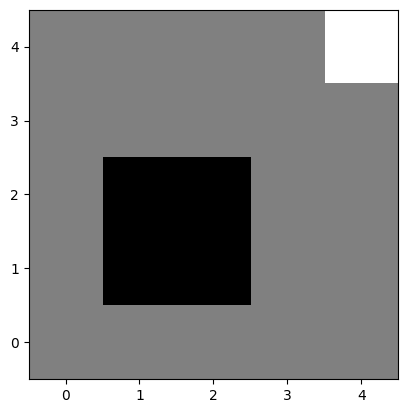

In [2]:
# solving car racing problem using monte carlo method reinforcement learning
# the car racing problem is a 5x5 grid, with the car starting in the bottom
# left corner, and the goal in the top right corner. The car can move up, down, left, or right 


# initialize the grid
grid = np.zeros((5,5))
# set the goal
grid[4,4] = 1
# set the starting position down in random row
# grid[4,np.random.randint(0,5)] = 2
# set walls
grid[1,1] = -1
grid[1,2] = -1
grid[2,1] = -1
grid[2,2] = -1
# grid[3,2] = -1
# grid[3,3] = -1
# grid[3,4] = -1

# plot the grid revers y-axis
plt.imshow(grid, cmap='gray')
plt.gca().invert_yaxis()
plt.show()

In [22]:
class Race:
    def __init__(self, grid):
        self.reward = None
        self.grid = grid
        self.step_num = 0
        self.state = np.array([np.random.randint(0, len(grid)), 0, 0, 0])  # x y dx dy
        self.returns = {(i, j, k, l, m, n): [] for i in range(len(grid)) for j in range(len(grid)) for k in range(-5, 6)
                        for l in range(6) for m in range(-1, 2) for n in range(-1, 2)}
        self.Q = {(i, j, k, l, m, n): 0 for i in range(len(grid)) for j in range(len(grid)) for k in range(-5, 6) for l
                  in range(6) for m in range(-1, 2) for n in range(-1, 2)}
        # random policy
        self.policy = {(i, j, k, l): np.random.randint(-1, 2, size=2) for i in range(len(grid)) for j in
                       range(len(grid)) for k in range(-5, 6) for l in range(6)}

        self.epsilon = 0.1
        self.alpha = 0.1
        self.gamma = 0.9
        self.is_done = False

    def get_action(self):
        # greedy policy
        if np.random.uniform(0, 1) > self.epsilon:
            return self.policy[self.state[0], self.state[1], self.state[2], self.state[3]]
        else:
            return np.random.randint(-1, 2, size=2)

    def reset(self):
        self.state = np.array([np.random.randint(0, len(grid)), 0, 0, 0])
        self.is_done = False

    def step(self, action):
        # move the car
        self.state[0] += self.state[2]  # x + dx
        self.state[1] += self.state[3]  # y + dy
        self.state[2] += action[0]
        self.state[3] += action[1]
        # check velocity
        if self.state[2] > 5:
            self.state[2] = 5
        elif self.state[2] < -5:
            self.state[2] = -5
        if self.state[3] > 5:
            self.state[3] = 5
        elif self.state[3] < 0:
            self.state[3] = 1
        # check if the car is out of bounds
        if self.state[0] < 0:
            self.state[0] = 0
            self.state[2] = 0
        elif self.state[0] > len(self.grid) - 1:
            self.state[0] = len(self.grid) - 1
            self.state[2] = 0
        if self.state[1] < 0:
            self.state[1] = 0
            self.state[3] = 0
        elif self.state[1] > len(self.grid) - 1:
            self.state[1] = len(self.grid) - 1
            self.state[3] = 0
        # check if the car hit a wall
        if self.grid[self.state[0], self.state[1]] == -1:
            self.is_done = True
            self.reward = -5
        # check if the car hit the goal
        elif self.grid[self.state[0], self.state[1]] == 1:
            self.is_done = True
            self.reward = 5
        else:
            self.is_done = False
            self.reward = -1

        # plot grid with car
        plt.imshow(self.grid, cmap='gray')
        plt.gca().invert_yaxis()
        plt.scatter(self.state[0], self.state[1], color='red')
        # plt.show()
        # save fig in folder for gif in location png dir
        
        plt.savefig('png_fig/' + str(self.step_num) + '.png')
        # close fig
        plt.close()
    
        self.step_num += 1

        print('State: ', self.state)
        return self.state, self.reward, self.is_done

    def play(self, episodes):
        for episode in range(episodes):
            # reset the car
            self.reset()
            # play the game
            while not self.is_done:
                # get the action
                action = self.get_action()
                # step the car
                state, reward, is_done = self.step(action)
                # add the reward to the returns
                self.returns[(state[0], state[1], state[2], state[3], action[0], action[1])].append(reward)
            # update the Q values
            for key in self.returns:
                # check is empty
                if len(self.returns[key]) > 0:
                    # update the Q value
                    self.Q[key] = np.mean(self.returns[key])
            # update the policy to be greedy to max Q
            for key in self.policy:
                for i in range(-1, 2):
                    max_reward = -np.inf
                    for j in range(-1, 2):
                        # find max Q to update policy
                        if self.Q[(key[0], key[1], key[2], key[3], i, j)] > max_reward:
                            max_reward = self.Q[(key[0], key[1], key[2], key[3], i, j)]
                            self.policy[(key[0], key[1], key[2], key[3])] = np.array([i, j])
            # print the policy
            print('Episode: ', episode)
            # print('Policy: ', self.policy)
            # print('Q: ', self.Q)
            # print('Returns: ', self.returns)
            # print('----------------------------------------')
            # reset the returns
            self.returns = {(i, j, k, l, m, n): [] for i in range(len(grid)) for j in range(len(grid)) for k in
                            range(-5, 6) for l in range(6) for m in range(-1, 2) for n in range(-1, 2)}


In [23]:
# play the game
game = Race(grid)
game.play(20)

State:  [2 0 0 1]
State:  [ 2  1 -1  1]
Episode:  0
State:  [3 0 1 1]
State:  [4 1 2 0]
State:  [4 1 0 1]
State:  [ 4  2 -1  1]
State:  [3 3 0 0]
State:  [3 3 1 1]
State:  [4 4 2 0]
Episode:  1
State:  [2 0 1 1]
State:  [3 1 2 0]
State:  [4 1 0 1]
State:  [4 2 1 1]
State:  [4 3 0 0]
State:  [ 4  3 -1  0]
State:  [3 3 0 1]
State:  [3 4 1 0]
State:  [4 4 0 0]
Episode:  2
State:  [4 0 1 1]
State:  [4 1 0 0]
State:  [4 1 1 1]
State:  [4 2 0 0]
State:  [4 2 1 1]
State:  [4 3 0 0]
State:  [4 3 1 1]
State:  [4 4 0 0]
Episode:  3
State:  [3 0 1 1]
State:  [4 1 2 1]
State:  [4 2 0 0]
State:  [4 2 1 0]
State:  [4 2 0 1]
State:  [4 3 1 0]
State:  [4 3 0 1]
State:  [4 4 1 0]
Episode:  4
State:  [0 0 1 1]
State:  [1 1 2 0]
Episode:  5
State:  [3 0 1 1]
State:  [4 1 2 1]
State:  [4 2 0 0]
State:  [4 2 1 0]
State:  [4 2 0 1]
State:  [4 3 1 1]
State:  [4 4 0 1]
Episode:  6
State:  [ 2  0 -1  0]
State:  [1 0 0 1]
State:  [1 1 1 0]
Episode:  7
State:  [1 0 1 1]
State:  [2 1 2 0]
Episode:  8
State:  [1 0

In [32]:
# make gif of the episodes
import imageio.v2 as imageio
import os
images = []
# ignore hidden files
for filename in sorted(os.listdir('png_fig/')):
    if filename.endswith('.png'):
        images.append(imageio.imread('png_fig/' + filename))        

# Save images as gif with 0.1 frame per second
imageio.mimsave('movie.gif', images, duration=500)



        
        

In [33]:
# plot the policy for just x and y -----> ax, ay direction on map

0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 0.0
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 0 0.2 -0.2
0 1 0.2 -0.2
0 1 0.2 -0.2
0 1 0.2 -0.2
0 1 0.2 -0.2
0 1 0.2 -0.2
0 1 0.2 -0.2
0 1 0.2 -0.2
0 1 0.2 -0.2
0 1 0.2 -0.2
0 1 0.2 -0.2
0 1 0.2 -0.2


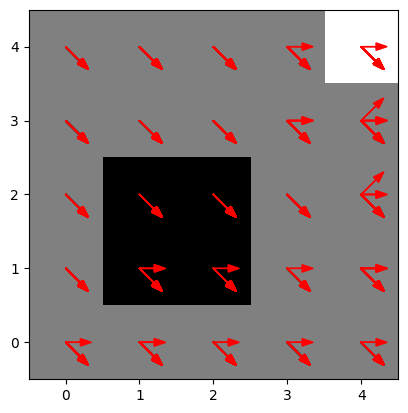

In [47]:
plt.imshow(grid, cmap='gray')
plt.gca().invert_yaxis()
# plot just for x and y and quiver for direction of ax, ay
for key in game.policy:
    plt.arrow(key[0], key[1], game.policy[key][0]/5, game.policy[key][1]/5, color='red', head_width=0.1)
    print(key[0], key[1], game.policy[key][0]/5, game.policy[key][1]/5)
    
plt.show()


In [41]:
plt.close()

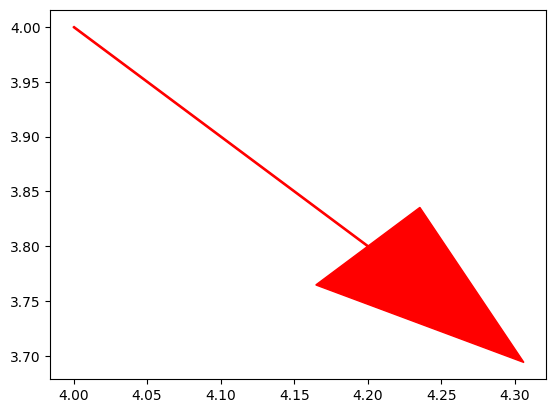

In [45]:
plt.arrow(key[0], key[1], game.policy[key][0]/5, game.policy[key][1]/5, color='red', head_width=0.1)
plt.show()